# Compute multi-model ensemble
10th, 50th and 90th percentiles output in a single file.

In [1]:
import xarray as xr
import lib_david

In [ ]:
#< Search parameters to filter files included in the MME
root_dir = "/g/data/ia39/ncra/drought_aridity/ai/" # replace with official delivery dir
index = "AI-atmospheric"
gwl = "GWL20"
data_type = "2D"
rcp = "rcp85"

file_out_name =(f"{root_dir}{index}_{data_type}_{gwl}")

In [11]:
#< Get files from root directory
files = lib_david.get_file_paths(root_dir,".nc",include=[index,gwl,rcp,data_type])
for file in files:
    print(file)
    
# Open files and split file strings for dimension names and add to list from which they are merged across the dimensions specified
da_list = []
for file in files:
    model = file.split('_')[2]
    bc = file.split('_')[-3]
    rcp = file.split('_')[3]
    gwl = file.split('_')[-1][:-3]

    print('Model: '+model, 'BC: '+bc, 'RCP: '+rcp, 'GWL: '+gwl)
    
    da = xr.open_dataset(file)['AI']
    da = da.expand_dims(dim={"model": [model],"bc": [bc],"rcp": [rcp],"gwl": [gwl]}, axis=[0,1,2,3])
    da_list.append(da)

# Merge data arrays and print output
da_all = xr.merge(da_list)
print(da_all)

/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_GFDL-ESM2M_rcp85_r1i1p1__r240x120-ISIMIP2b_2D_GWL20.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_GFDL-ESM2M_rcp85_r1i1p1_r240x120-QME_2D_GWL20.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_GFDL-ESM2M_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL20.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_GFDL-ESM2M_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL20.nc
Model: NHP1-AUS-5 BC: r240x120-ISIMIP2b RCP: GFDL-ESM2M GWL: GWL20
Model: NHP1-AUS-5 BC: r240x120-QME RCP: GFDL-ESM2M GWL: GWL20
Model: NHP1-AUS-5 BC: r240x120-MRNBC RCP: GFDL-ESM2M GWL: GWL20
Model: NHP1-AUS-5 BC: CSIRO-CCAM-r3355-r240x120-ISIMIP2b RCP: GFDL-ESM2M GWL: GWL20
<xarray.Dataset> Size: 9MB
Dimensions:  (lon: 841, lat: 681, model: 1, bc: 4, rcp: 1, gwl: 1)
Coordinates:
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
  * lat      (lat) float64 5kB -44.0 

### Compute quantiles across models, bc-methods and rcps/ssps (if appliccable)
Upper:  90th percentile = 0.9
Median: 50th percentile = 0.5
Lower:  10th percentile = 0.1

In [6]:
quantiles = da_all.quantile([0.1, 0.5, 0.9], dim=["model","bc","rcp"])

### Plot and check for feasible outcome

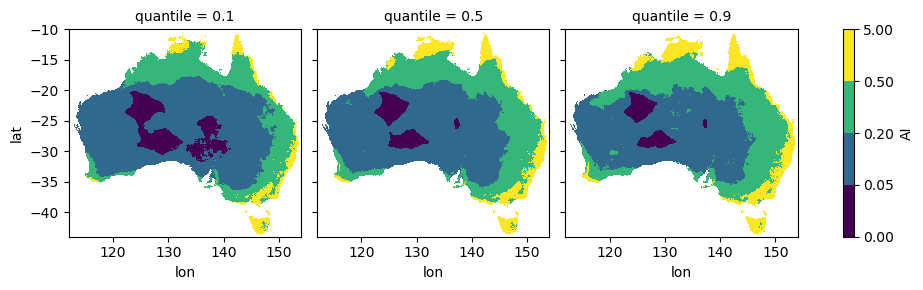

In [10]:
#< Aridity Index (AI):
quantiles.AI.plot(col="quantile", levels=[0,0.05,0.2,0.5,5])